# Week 4
## Prelude part 1: Regular Expressions

### Google regex tutorial

In [1]:
import re

In [2]:
str = 'purple alice-b@google.com monkey dishwasher'
match = re.search(r'\w+@\w+', str)
if match:
  print(match.group())  ## 'b@google'

b@google


Use [] to indicate a set of chars. In this case we can match for - and . by simply placing them inside [] together with /w. You can use a dash - to indicate a range ex. [a-z]

In [3]:
  match = re.search(r'[\w.-]+@[\w.-]+', str)
  if match:
    print(match.group())  ## 'alice-b@google.com'

alice-b@google.com


One can extract groups of the matched string by utilizing ():

In [4]:
  str = 'purple alice-b@google.com monkey dishwasher'
  match = re.search(r'([\w.-]+)@([\w.-]+)', str)
  if match:
    print (match.group())  ## 'alice-b@google.com' (the whole match)
    print (match.group(1))  ## 'alice-b' (the username, group 1)
    print (match.group(2))  ## 'google.com' (the host, group 2)

alice-b@google.com
alice-b
google.com


`re.search()` finds only the first match in a string. One can use `re.finall()` to find all matched of a pattern in a string:

In [5]:
  ## Suppose we have a text with many email addresses
  str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

  ## Here re.findall() returns a list of all the found email strings
  emails = re.findall(r'[\w\.-]+@[\w\.-]+', str) ## ['alice@google.com', 'bob@abc.com']
  for email in emails:
    # do something with each found email string
    print(email)

alice@google.com
bob@abc.com


Using findall with files: 

In [6]:
  # Open file
  with open('test.txt', 'r') as f:
    # Feed the file text into findall(); it returns a list of all the found strings
    strings = re.findall(r'some pattern', f.read())

Using groups with findall:

In [7]:
  str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
  tuples = re.findall(r'([\w\.-]+)@([\w\.-]+)', str)
  print(tuples)  ## [('alice', 'google.com'), ('bob', 'abc.com')]
  for tuple in tuples:
    print(tuple[0])  ## username
    print(tuple[1])  ## host

[('alice', 'google.com'), ('bob', 'abc.com')]
alice
google.com
bob
abc.com


Substitution with regex is also possible:


In [8]:
  str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
  ## re.sub(pat, replacement, str) -- returns new string with all replacements,
  ## \1 is group(1), \2 group(2) in the replacement
  print(re.sub(r'([\w\.-]+)@([\w\.-]+)', r'\1@yo-yo-dyne.com', str))
  ## purple alice@yo-yo-dyne.com, blah monkey bob@yo-yo-dyne.com blah dishwasher

purple alice@yo-yo-dyne.com, blah monkey bob@yo-yo-dyne.com blah dishwasher


**explain in your own words: what are regular expressions?**

Regular expressions are confiugrable patterns used to match substrings.

**Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use findall to show that your regex works on test.txt. Hint: a great place to test out regular expressions is: [regex101.com](https://regex101.com).**

In [9]:
with open('test.txt', 'r') as f:
  matches = re.findall(r'\s\d{4}\s', f.read())

for match in matches:
  print(match)

 1234 
 9999 


**Provide an example of a regex to match words starting with "super"**

In [10]:
with open ('test.txt', 'r') as f:
  matches = re.findall(r'\bsuper\w*', f.read())

for match in matches:
  print(match)

superpolaroid
supertaxidermy
superbeer


**Exercise: Regular expressions round 2. Show that you can extract the direct Zelda wiki links of the format `{{Term|BotW|name of character|link}}` from the test-zelda.txt**

In [11]:
with open('test-zelda.txt', 'r') as f:
  matches = re.findall(r'({{\w*\|BotW\|([^|]*)\|link}})', f.read())

for match in matches:
  print(match)

('{{Term|BotW|Link|link}}', 'Link')
('{{Term|BotW|Divine Beast Vah Rudania|link}}', 'Divine Beast Vah Rudania')


## Prelude part 2: Pandas DataFrames

### Pandas tutorial

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [14]:
dates = pd.date_range('20130101', periods=6) # Dates with intervals increasing in day
print(dates)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,0.830068,-0.118337,-0.361716,0.852432
2013-01-02,0.931691,-0.422776,0.995367,-0.093040
2013-01-03,1.368355,-0.492304,2.047285,-0.478217
2013-01-04,0.912463,-0.449961,-0.118328,-1.201654
2013-01-05,-1.379571,1.946948,-2.387334,0.292300
2013-01-06,-1.087090,-1.598587,0.087611,-0.035066


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [15]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.date_range('20130102', periods=4),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-03,1.0,3,train,foo
2,1.0,2013-01-04,1.0,3,test,foo
3,1.0,2013-01-05,1.0,3,train,foo


In [16]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### Viewing data

In [17]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-03,1.0,3,train,foo
2,1.0,2013-01-04,1.0,3,test,foo
3,1.0,2013-01-05,1.0,3,train,foo


In [18]:
df2.tail()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-03,1.0,3,train,foo
2,1.0,2013-01-04,1.0,3,test,foo
3,1.0,2013-01-05,1.0,3,train,foo


In [19]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [20]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [21]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-03 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-04 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-05 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [22]:
df2.describe

<bound method NDFrame.describe of      A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-03  1.0  3  train  foo
2  1.0 2013-01-04  1.0  3   test  foo
3  1.0 2013-01-05  1.0  3  train  foo>

In [23]:
df2.T # transpose

,0,1,2,3
A,1.0,1.0,1.0,1.0
B,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00
C,1.0,1.0,1.0,1.0
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [24]:
df2.sort_index(axis=1, ascending=False)

,F,E,D,C,B,A
0,foo,test,3,1.0,2013-01-02,1.0
1,foo,train,3,1.0,2013-01-03,1.0
2,foo,test,3,1.0,2013-01-04,1.0
3,foo,train,3,1.0,2013-01-05,1.0


In [25]:
df2.sort_values(by='B')

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-03,1.0,3,train,foo
2,1.0,2013-01-04,1.0,3,test,foo
3,1.0,2013-01-05,1.0,3,train,foo


#### Selection

In [26]:
df['A']

2013-01-01    0.830068
2013-01-02    0.931691
2013-01-03    1.368355
2013-01-04    0.912463
2013-01-05   -1.379571
2013-01-06   -1.087090
Freq: D, Name: A, dtype: float64

In [27]:
df[0:3]

,A,B,C,D
2013-01-01,0.830068,-0.118337,-0.361716,0.852432
2013-01-02,0.931691,-0.422776,0.995367,-0.093040
2013-01-03,1.368355,-0.492304,2.047285,-0.478217


In [28]:
df.loc[dates[0]]

A    0.830068
B   -0.118337
C   -0.361716
D    0.852432
Name: 2013-01-01 00:00:00, dtype: float64

In [29]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.830068,-0.118337
2013-01-02,0.931691,-0.422776
2013-01-03,1.368355,-0.492304
2013-01-04,0.912463,-0.449961
2013-01-05,-1.379571,1.946948
2013-01-06,-1.087090,-1.598587


In [30]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.931691,-0.422776
2013-01-03,1.368355,-0.492304
2013-01-04,0.912463,-0.449961


In [31]:
df.loc['20130102',['A','B']]

A    0.931691
B   -0.422776
Name: 2013-01-02 00:00:00, dtype: float64

In [32]:
df.loc[dates[0],'A']

0.8300682146433379

In [33]:
df.at[dates[0],'A'] # faster than loc

0.8300682146433379

In [34]:
df.iloc[3]

A    0.912463
B   -0.449961
C   -0.118328
D   -1.201654
Name: 2013-01-04 00:00:00, dtype: float64

In [35]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.912463,-0.449961
2013-01-05,-1.379571,1.946948


In [36]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.931691,0.995367
2013-01-03,1.368355,2.047285
2013-01-05,-1.379571,-2.387334


In [37]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.931691,-0.422776,0.995367,-0.093040
2013-01-03,1.368355,-0.492304,2.047285,-0.478217


In [38]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.118337,-0.361716
2013-01-02,-0.422776,0.995367
2013-01-03,-0.492304,2.047285
2013-01-04,-0.449961,-0.118328
2013-01-05,1.946948,-2.387334
2013-01-06,-1.598587,0.087611


In [39]:
df.iloc[1,1]

-0.4227756970026081

In [40]:
df.iat[1,1] # faster than iloc

-0.4227756970026081

In [41]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.830068,-0.118337,-0.361716,0.852432
2013-01-02,0.931691,-0.422776,0.995367,-0.093040
2013-01-03,1.368355,-0.492304,2.047285,-0.478217
2013-01-04,0.912463,-0.449961,-0.118328,-1.201654


In [42]:
df[df > 0]

,A,B,C,D
2013-01-01,0.830068,NaN,NaN,0.852432
2013-01-02,0.931691,NaN,0.995367,NaN
2013-01-03,1.368355,NaN,2.047285,NaN
2013-01-04,0.912463,NaN,NaN,NaN
2013-01-05,NaN,1.946948,NaN,0.292300
2013-01-06,NaN,NaN,0.087611,NaN


In [43]:
df3 = df.copy()
df3['E'] = ['one', 'one','two','three','four','three']
df3

,A,B,C,D,E
2013-01-01,0.830068,-0.118337,-0.361716,0.852432,one
2013-01-02,0.931691,-0.422776,0.995367,-0.093040,one
2013-01-03,1.368355,-0.492304,2.047285,-0.478217,two
2013-01-04,0.912463,-0.449961,-0.118328,-1.201654,three
2013-01-05,-1.379571,1.946948,-2.387334,0.292300,four
2013-01-06,-1.087090,-1.598587,0.087611,-0.035066,three


In [44]:
df3[df3['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.368355,-0.492304,2.047285,-0.478217,two
2013-01-05,-1.379571,1.946948,-2.387334,0.292300,four


In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6)) # Aligns data by the indexes
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1

In [47]:
df.at[dates[0],'A'] = 0

In [48]:
df.iat[0,1] = 0

In [49]:
df.loc[:,'D'] = np.array([5] * len(df))

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.361716,5,NaN
2013-01-02,0.931691,-0.422776,0.995367,5,1.0
2013-01-03,1.368355,-0.492304,2.047285,5,2.0
2013-01-04,0.912463,-0.449961,-0.118328,5,3.0
2013-01-05,-1.379571,1.946948,-2.387334,5,4.0
2013-01-06,-1.087090,-1.598587,0.087611,5,5.0


In [51]:
df3 = df.copy()
df3[df3 > 0] = -df3
df3

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.361716,-5,NaN
2013-01-02,-0.931691,-0.422776,-0.995367,-5,-1.0
2013-01-03,-1.368355,-0.492304,-2.047285,-5,-2.0
2013-01-04,-0.912463,-0.449961,-0.118328,-5,-3.0
2013-01-05,-1.379571,-1.946948,-2.387334,-5,-4.0
2013-01-06,-1.087090,-1.598587,-0.087611,-5,-5.0


#### Missing data

In [52]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.361716,5,NaN,1.0
2013-01-02,0.931691,-0.422776,0.995367,5,1.0,1.0
2013-01-03,1.368355,-0.492304,2.047285,5,2.0,NaN
2013-01-04,0.912463,-0.449961,-0.118328,5,3.0,NaN


In [53]:
df1.dropna(how='any') # Drop rows with missing data

,A,B,C,D,F,E
2013-01-02,0.931691,-0.422776,0.995367,5,1.0,1.0


In [54]:
df1.fillna(value=5) # Fill missing data


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.361716,5,5.0,1.0
2013-01-02,0.931691,-0.422776,0.995367,5,1.0,1.0
2013-01-03,1.368355,-0.492304,2.047285,5,2.0,5.0
2013-01-04,0.912463,-0.449961,-0.118328,5,3.0,5.0


In [55]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


#### Operations

In [56]:
df.mean()

A    0.124308
B   -0.169447
C    0.043814
D    5.000000
F    3.000000
dtype: float64

In [57]:
df.mean(1)

2013-01-01    1.159571
2013-01-02    1.500856
2013-01-03    1.984667
2013-01-04    1.668835
2013-01-05    1.436009
2013-01-06    1.480387
Freq: D, dtype: float64

In [58]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [59]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.368355,-1.492304,1.047285,4.0,1.0
2013-01-04,-2.087537,-3.449961,-3.118328,2.0,0.0
2013-01-05,-6.379571,-3.053052,-7.387334,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [60]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.361716,5,NaN
2013-01-02,0.931691,-0.422776,0.995367,5,1.0
2013-01-03,1.368355,-0.492304,2.047285,5,2.0
2013-01-04,0.912463,-0.449961,-0.118328,5,3.0
2013-01-05,-1.379571,1.946948,-2.387334,5,4.0
2013-01-06,-1.087090,-1.598587,0.087611,5,5.0


#### Apply

In [61]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.361716,5,NaN
2013-01-02,0.931691,-0.422776,0.633651,10,1.0
2013-01-03,2.300046,-0.915080,2.680936,15,3.0
2013-01-04,3.212509,-1.365041,2.562608,20,6.0
2013-01-05,1.832938,0.581907,0.175274,25,10.0
2013-01-06,0.745848,-1.016680,0.262885,30,15.0


In [62]:
df.apply(lambda x: x.max() - x.min())

A    2.747926
B    3.545535
C    4.434619
D    0.000000
F    4.000000
dtype: float64

#### Histogramming

In [63]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    6
2    0
3    3
4    6
5    6
6    2
7    1
8    4
9    4
dtype: int64

In [64]:
s.value_counts()

6    3
2    2
4    2
0    1
3    1
1    1
dtype: int64

In [65]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Merge

In [66]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.141916,-0.838144,0.301563,0.408257
1,-2.546323,-0.712951,-0.474911,1.779775
2,-0.682579,1.937809,-0.831243,0.162618
3,0.595317,-0.768298,-0.564715,-0.741228
4,0.390290,-1.535107,0.194918,-0.411928
5,0.091428,-0.146216,0.025107,-0.056825
6,1.143752,1.276807,0.141637,-1.631296
7,-1.047582,-1.027502,-0.697259,0.060576
8,0.550175,-0.753517,-1.035472,-0.590784
9,-0.681532,0.324329,0.104346,0.065866


In [67]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.141916 -0.838144  0.301563  0.408257
 1 -2.546323 -0.712951 -0.474911  1.779775
 2 -0.682579  1.937809 -0.831243  0.162618,
           0         1         2         3
 3  0.595317 -0.768298 -0.564715 -0.741228
 4  0.390290 -1.535107  0.194918 -0.411928
 5  0.091428 -0.146216  0.025107 -0.056825
 6  1.143752  1.276807  0.141637 -1.631296,
           0         1         2         3
 7 -1.047582 -1.027502 -0.697259  0.060576
 8  0.550175 -0.753517 -1.035472 -0.590784
 9 -0.681532  0.324329  0.104346  0.065866]

In [68]:
pd.concat(pieces)

,0,1,2,3
0,-0.141916,-0.838144,0.301563,0.408257
1,-2.546323,-0.712951,-0.474911,1.779775
2,-0.682579,1.937809,-0.831243,0.162618
3,0.595317,-0.768298,-0.564715,-0.741228
4,0.390290,-1.535107,0.194918,-0.411928
5,0.091428,-0.146216,0.025107,-0.056825
6,1.143752,1.276807,0.141637,-1.631296
7,-1.047582,-1.027502,-0.697259,0.060576
8,0.550175,-0.753517,-1.035472,-0.590784
9,-0.681532,0.324329,0.104346,0.065866


In [69]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [70]:
right

,key,rval
0,foo,4
1,foo,5


In [71]:
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [72]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.265957,1.439418,-0.745444,-1.319345
1,-0.142954,1.340376,-1.481246,-0.725336
2,-0.717567,-1.015312,0.781908,0.717074
3,1.154822,-1.279275,-1.111041,-0.575498
4,1.841796,1.388988,0.091858,-3.797093
5,-0.069115,-1.735936,0.283129,-1.069988
6,0.395693,-0.661129,0.370930,0.566077
7,0.384317,1.168629,-0.010075,-0.774364


In [73]:
s = df.iloc[3]
s

A    1.154822
B   -1.279275
C   -1.111041
D   -0.575498
Name: 3, dtype: float64

In [74]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.265957,1.439418,-0.745444,-1.319345
1,-0.142954,1.340376,-1.481246,-0.725336
2,-0.717567,-1.015312,0.781908,0.717074
3,1.154822,-1.279275,-1.111041,-0.575498
4,1.841796,1.388988,0.091858,-3.797093
5,-0.069115,-1.735936,0.283129,-1.069988
6,0.395693,-0.661129,0.370930,0.566077
7,0.384317,1.168629,-0.010075,-0.774364
8,1.154822,-1.279275,-1.111041,-0.575498


#### Grouping

By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

In [75]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.784794,-0.635447
1,bar,one,-0.657798,-0.289722
2,foo,two,0.065994,0.886252
3,bar,three,1.138551,0.476962
4,foo,two,-0.434612,0.348449
5,bar,two,2.168349,-0.161159
6,foo,one,-0.888410,0.194893
7,foo,three,0.492653,0.230809


In [76]:
df.groupby('A').sum()

,C,D
A,,
bar,2.649101,0.026080
foo,0.020419,1.024956


In [77]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.657798 -0.289722
    three  1.138551  0.476962
    two    2.168349 -0.161159
foo one   -0.103616 -0.440554
    three  0.492653  0.230809
    two   -0.368618  1.234701

#### Reshaping

In [78]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.061852 -0.745379
      two     0.107286 -0.848676
baz   one    -0.418414  0.319339
      two     1.069609  0.508689

In [79]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.061852
               B   -0.745379
       two     A    0.107286
               B   -0.848676
baz    one     A   -0.418414
               B    0.319339
       two     A    1.069609
               B    0.508689
dtype: float64

In [80]:
stacked.unstack()

A         B
first second                    
bar   one    -0.061852 -0.745379
      two     0.107286 -0.848676
baz   one    -0.418414  0.319339
      two     1.069609  0.508689

#### Pivot Tables

In [81]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.647854,0.111642
1,one,B,foo,-0.323837,0.562764
2,two,C,foo,-0.245810,0.131302
3,three,A,bar,0.246748,1.939989
4,one,B,bar,-0.307507,1.636271
5,one,C,bar,1.687495,-1.049499
6,two,A,foo,1.464458,-1.528477
7,three,B,foo,0.341467,-0.460918
8,one,C,foo,0.587705,0.894225
9,one,A,bar,-0.001329,1.833867


In [82]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.001329 -0.647854
      B -0.307507 -0.323837
      C  1.687495  0.587705
three A  0.246748       NaN
      B       NaN  0.341467
      C -0.145021       NaN
two   A       NaN  1.464458
      B -0.648334       NaN
      C       NaN -0.245810

#### Time Series

In [83]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24483
Freq: 5T, dtype: int64

In [84]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.991336
2012-03-07    1.065255
2012-03-08    1.127958
2012-03-09    0.511207
2012-03-10   -0.405983
Freq: D, dtype: float64

In [86]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.991336
2012-03-07 00:00:00+00:00    1.065255
2012-03-08 00:00:00+00:00    1.127958
2012-03-09 00:00:00+00:00    0.511207
2012-03-10 00:00:00+00:00   -0.405983
Freq: D, dtype: float64

In [87]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.991336
2012-03-06 19:00:00-05:00    1.065255
2012-03-07 19:00:00-05:00    1.127958
2012-03-08 19:00:00-05:00    0.511207
2012-03-09 19:00:00-05:00   -0.405983
Freq: D, dtype: float64

In [88]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    2.164744
2012-02-29   -0.646781
2012-03-31    0.057894
2012-04-30   -0.404280
2012-05-31   -1.089575
Freq: M, dtype: float64

In [89]:
ps = ts.to_period()
ps

2012-01    2.164744
2012-02   -0.646781
2012-03    0.057894
2012-04   -0.404280
2012-05   -1.089575
Freq: M, dtype: float64

In [90]:
ps.to_timestamp()

2012-01-01    2.164744
2012-02-01   -0.646781
2012-03-01    0.057894
2012-04-01   -0.404280
2012-05-01   -1.089575
Freq: MS, dtype: float64

In [92]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.867542
1990-06-01 09:00    0.969724
1990-09-01 09:00    1.259062
1990-12-01 09:00    0.289436
1991-03-01 09:00   -0.384307
Freq: H, dtype: float64

#### Categoricals

In [94]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [96]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [97]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [98]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [99]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [100]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

#### Plotting

<AxesSubplot:>

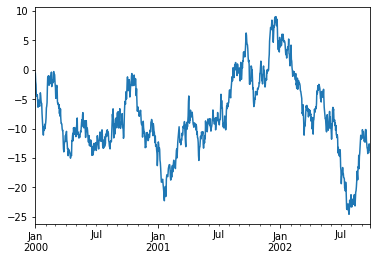

In [102]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

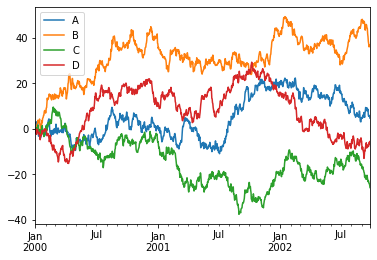

In [105]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

#### Getting data in/out

In [107]:
df.to_csv('foo.csv')

In [108]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.184458,-1.106934,-0.696439,0.045929
1,2000-01-02,-0.141079,-1.904874,-1.147657,-0.815008
2,2000-01-03,0.199233,-0.948098,-0.846815,-2.031173
3,2000-01-04,3.094075,-0.980006,-0.588808,-0.718286
4,2000-01-05,2.333465,0.062353,0.255364,-2.421652
...,...,...,...,...,...
995,2002-09-22,5.584820,37.547091,-23.243547,-7.611989
996,2002-09-23,5.912470,36.122142,-23.987460,-6.474178
997,2002-09-24,5.877654,36.621384,-24.097819,-5.815126
998,2002-09-25,5.280251,37.019494,-24.705458,-6.743740
